In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


Here is some code using [LALSimulation](http://software.ligo.org/docs/lalsuite/lalsimulation/index.html) and [Astropy](http://www.astropy.org) to estimate sensitivity to spins for a hypothetical "GW150914-like" system (30+40).  WARNING: such systems are probably much more rare than a "GW151226-like" system because the true mass distribution is strongly downward-sloping (in fact, Salpeter-like power laws $p(m) \sim m^{-2.35}$ are entirely consistent with the current observations); see [Abbott, et al. (2017)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.118.221101).

In [2]:
import sys
try:
    sys.path.index('.')
except ValueError:
    sys.path.append('.')

In [3]:
import h5py
import vt

Let's set up a grid in $\chi_1$, $\chi_2$ space, with fixed masses:

In [4]:
chi1s = linspace(-0.99, 0.99, 25)
chi2s = linspace(-0.99, 0.99, 25)
CHI1S, CHI2S = meshgrid(chi1s, chi2s)
M1S = 40.0*ones_like(CHI1S)
M2S = 30.0*ones_like(CHI2S)

`vt.vts_from_masses_spins` will return a list of sensitive spacetime volumes at the corresponding mass and spins; `8.0` is the suggested single-IFO threshold from [Abbott, et al. (2016)](http://iopscience.iop.org/article/10.3847/2041-8205/833/1/L1/meta), `1.0` is the total time of the observation (in this case we will re-normalise to the population average sensitivity, so this will drop out).

In [5]:
VTS = reshape(vt.vts_from_masses_spins(M1S.ravel(), M2S.ravel(), CHI1S.ravel(), CHI2S.ravel(), 8.0, 1.0), CHI1S.shape)

Because `pcolomesh` plots colours *inside* the corresponding rectangle, the dimensions of `VTS` should be one less than `CHI1S`, etc, so we average the values at the corners to get the value in the cell.  Note that we normalise $VT$ to the population average (the population is $m_1 = 40\, M_\odot$, $m_2 = 30 \, M_\odot$, $\chi_{1,2} \sim U\left( -1 , 1 \right)$).

In [6]:
VTS = 0.25*(VTS[1:,1:] + VTS[1:,:-1] + VTS[:-1,1:] + VTS[:-1,:-1])
VTS /= mean(VTS)

And the sensitivity as a function of $\chi_{1,2}$:

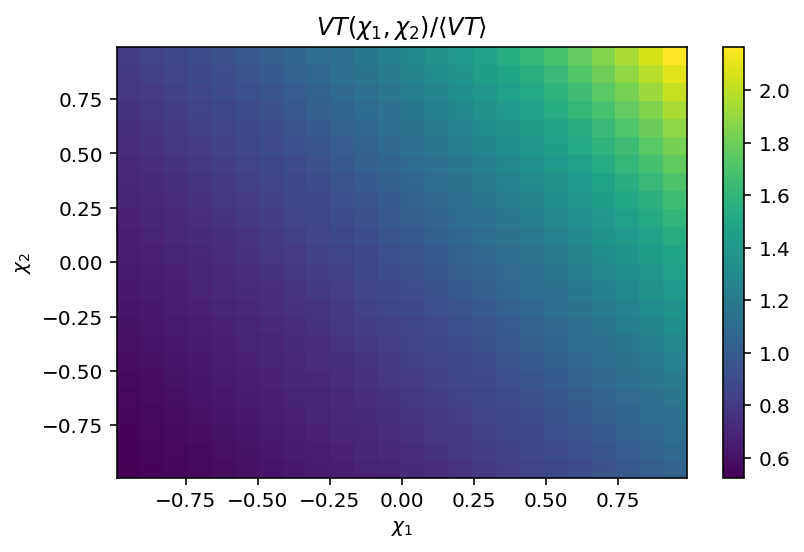

In [9]:
pcolormesh(CHI1S, CHI2S, VTS)
colorbar()
xlabel(r'$\chi_1$')
ylabel(r'$\chi_2$')
title(r'$VT\left( \chi_1, \chi_2 \right) / \langle VT \rangle$')
tight_layout()
savefig('GW150914-like-VTs.pdf')

In [10]:
with h5py.File('GW150914-like-VTs.h5','w') as out:
    out.create_dataset('chi1', data=CHI1S, compression='gzip', shuffle=True)
    out.create_dataset('chi2', data=CHI2S, compression='gzip', shuffle=True)
    out.create_dataset('VT', data=VTS, compression='gzip', shuffle=True)
    out.attrs['MUnits'] = 'MSun'
    out.attrs['m1'] = 40.0
    out.attrs['m2'] = 30.0